In [22]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from sklearn.decomposition import PCA
import pandas as pd

<a href='https://nlp.stanford.edu/pubs/glove.pdf' target='_blank'> Glove paper </a>

In [23]:
small_glove_embeddings = {
    'king': np.array([0.52654, -0.24538, 0.46737, 0.70348, 0.23647, 0.45902, -0.50265, -0.02281, 0.65211, -0.08349]),
    'queen': np.array([0.31703, -0.17573, 0.56205, 0.70857, 0.07399, 0.54469, -0.29225, -0.00839, 0.67575, 0.07804]),
    'man': np.array([0.42751, -0.20688, 0.45803, 0.63649, 0.18779, 0.31568, -0.37995, -0.06743, 0.48653, -0.09921]),
    'woman': np.array([0.25492, -0.15052, 0.52889, 0.67948, 0.04324, 0.44135, -0.21645, -0.05523, 0.56297, 0.03745]),
    'apple': np.array([0.19380, 0.21778, 0.38197, 0.66207, 0.08827, 0.28768, -0.34323, -0.10373, 0.52489, -0.16557]),
    'banana': np.array([0.11680, 0.27282, 0.31370, 0.58726, 0.16211, 0.35647, -0.32118, -0.12783, 0.50146, -0.19622]),
    'cat': np.array([0.24788, -0.04950, 0.31342, 0.63817, 0.03495, 0.21575, -0.28760, -0.08599, 0.46724, -0.18518]),
    'dog': np.array([0.30956, -0.06601, 0.29654, 0.58809, 0.09847, 0.23591, -0.31250, -0.05747, 0.49033, -0.14416]),
}

In [24]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

In [25]:
KING = 'king'
QUEEN = 'queen'
BANANA = 'banana'

In [26]:
glove_king = small_glove_embeddings[KING]
glove_queen = small_glove_embeddings[QUEEN]
glove_banana = small_glove_embeddings[BANANA]

In [27]:
similarity = cosine_similarity(glove_king, glove_queen)
less_similarity = cosine_similarity(glove_king, glove_banana)

In [28]:
print(f"Cosine Similarity between '{KING}' and '{QUEEN}': {similarity}")
print(f"Cosine Similarity between '{KING}' and '{BANANA}': {less_similarity}")

Cosine Similarity between 'king' and 'queen': 0.9586061635641476
Cosine Similarity between 'king' and 'banana': 0.8538639120049808


In [29]:
def plot_embeddings(embeddings):
    words = list(embeddings.keys())
    vectors = np.array(list(small_glove_embeddings.values()))

    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    plt.figure(figsize=(8, 6))
    for word, vector in zip(words, reduced_vectors):
        plt.scatter(vector[0], vector[1])
        plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=12)

    plt.title("2D PCA plot of word vectors")
    plt.grid(True)
    plt.show()

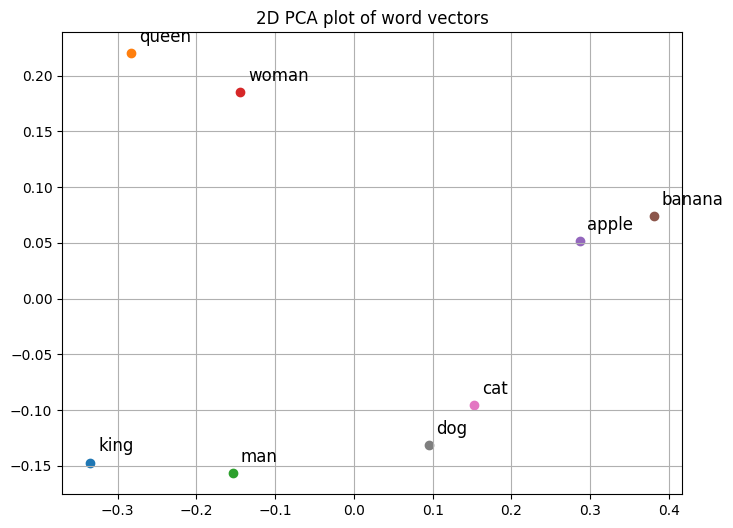

In [30]:
plot_embeddings(small_glove_embeddings)

In [31]:
glove_man = small_glove_embeddings['man']
glove_woman = small_glove_embeddings['woman']

In [32]:
glove_man

array([ 0.42751, -0.20688,  0.45803,  0.63649,  0.18779,  0.31568,
       -0.37995, -0.06743,  0.48653, -0.09921])

In [33]:
glove_queen

array([ 0.31703, -0.17573,  0.56205,  0.70857,  0.07399,  0.54469,
       -0.29225, -0.00839,  0.67575,  0.07804])

In [34]:
what_are_you = glove_king - glove_man + glove_woman

In [35]:
small_glove_embeddings['wannabe_queen'] = what_are_you

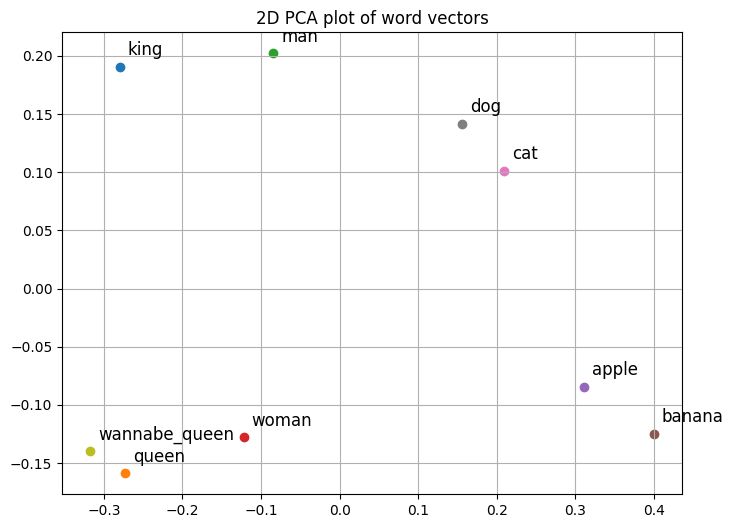

In [36]:
plot_embeddings(small_glove_embeddings)

In [37]:
small_glove_embeddings['wannabe_queen']

array([ 0.35395, -0.18902,  0.53823,  0.74647,  0.09192,  0.58469,
       -0.33915, -0.01061,  0.72855,  0.05317])